# Notebook — Spambase: Détection de spam


Le dataset Spambase contient 4601 e-mails étiquetés spam ou non-spam, avec 58 attributs décrivant la fréquence de mots, de caractères et l’usage des majuscules. 

Créé par HP Labs, il sert à entraîner et évaluer des modèles de détection de spam. Il illustre la diversité du spam et les difficultés liées aux faux positifs dans la classification.

### Plan :
1- Chargement et visualisation du dataset

2- Prétraitement des données

3- Entrainement des données

4- Evaluation et comparaison

5- Conclusions

## Imports

In [1]:
import sys
import os

# Ajouter la racine du projet à PYTHONPATH
project_path = os.path.abspath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

print("Chemin ajouté :", project_path)


Chemin ajouté : /Users/aliiii/Desktop/projects/ml-project-ue-a


In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) ## pour ignorer les warnings de RuntimeWarning


from src.ml_workflow import * 


## 1- Chargement et visualisation du dataset

In [ ]:
spam_path = os.path.join("..", "data", "spambase", "spambase.data")
df = load_data(spam_path)
df.shape, df.head()

Dataset Spambase chargé : 4601 lignes, 58 colonnes
Aperçu des données :
   word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \

((4601, 58),
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0            0.00               0.64           0.64           0.0   
 1            0.21               0.28           0.50           0.0   
 2            0.06               0.00           0.71           0.0   
 3            0.00               0.00           0.00           0.0   
 4            0.00               0.00           0.00           0.0   
 
    word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0           0.32            0.00              0.00                0.00   
 1           0.14            0.28              0.21                0.07   
 2           1.23            0.19              0.19                0.12   
 3           0.63            0.00              0.31                0.63   
 4           0.63            0.00              0.31                0.63   
 
    word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
 0             0.00            0.00  ...   

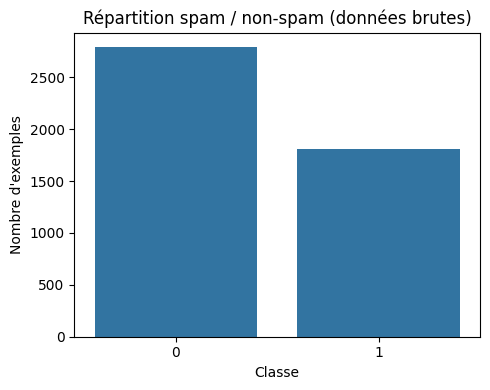

spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64

In [ ]:
y_raw = df["spam"]
plot_class_distribution(y_raw, title="Répartition spam / non-spam (données brutes)")
y_raw.value_counts(normalize=True)

In [5]:
# Prétraitement : normalisation + gestion valeurs manquantes
df_clean, pca_model = preprocess_data(df, target_column="spam")


df_clean.shape, df_clean.head()


((4601, 58),
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
 0            0.00               0.64           0.64           0.0   
 1            0.21               0.28           0.50           0.0   
 2            0.06               0.00           0.71           0.0   
 3            0.00               0.00           0.00           0.0   
 4            0.00               0.00           0.00           0.0   
 
    word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
 0           0.32            0.00              0.00                0.00   
 1           0.14            0.28              0.21                0.07   
 2           1.23            0.19              0.19                0.12   
 3           0.63            0.00              0.31                0.63   
 4           0.63            0.00              0.31                0.63   
 
    word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
 0             0.00            0.00  ...   

In [6]:
# afficher Le nombre de lignes et de colonnes, le nom et le type de chaque colonne et le nombre de valeurs non nulles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [7]:
# afficher des statistiques descriptives sur les colonnes
df.describe()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## Commentaires:
- Le dataset 4601 données d'entrées et 58 attributs dont 57 featues et une classe label. 
- On n'a pas de données manquantes. En effet, on a 0 valeur nulle pour toutes les colonnes du dataset.
- Comme le dataset est équilibré (39,4% de spam), les métriques comme la F1-score et la courbe PR (Precision-Recall) sont particulièrement pertinentes pour évaluer les performances des modèles.

In [8]:
# On affiche la matrice de corrélation 
corr = df.drop(columns=['spam']).corr(method='pearson')
print("La taille de la matrice de corrélation est ",corr.shape)  # Pour vérifier la taille
print("Matrice de corrélation")
display(corr)

La taille de la matrice de corrélation est  (57, 57)
Matrice de corrélation


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.031693,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.031408,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.021224,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.026017,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,-0.016842,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273


### On visualise la matrice de corrélation avec seulement les 30 features les plus corrélées  : 

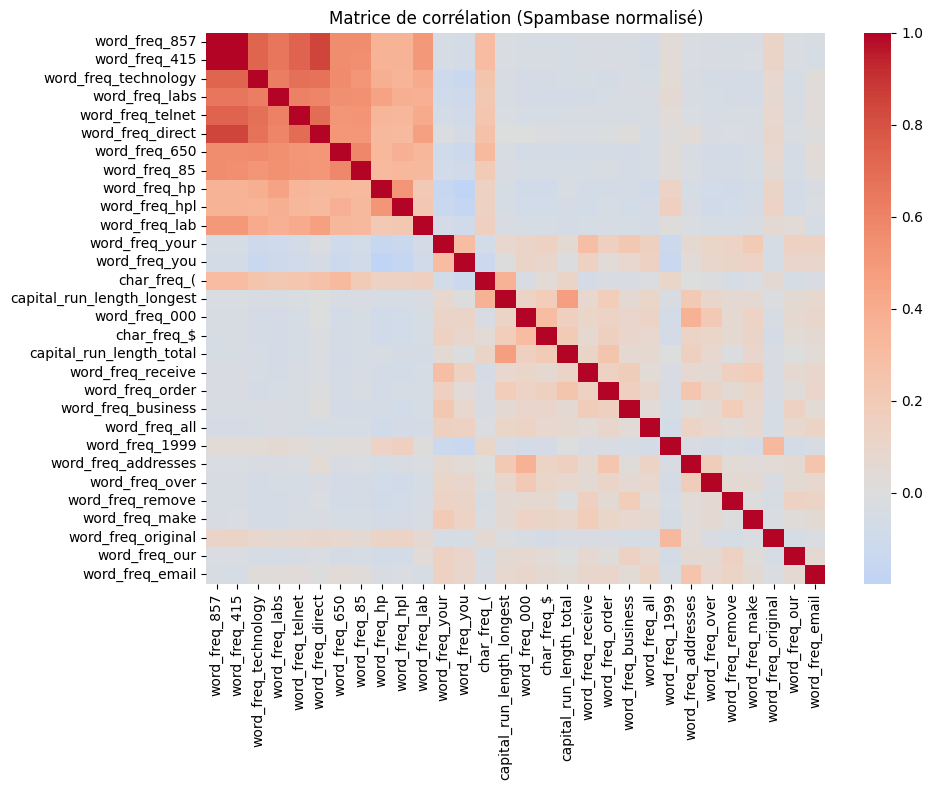

In [9]:
plot_correlation_heatmap(
    df_clean,
    target_column="spam",
    max_features=30,
    title="Matrice de corrélation (Spambase normalisé)"
)

### Entre les 10 features les plus corrélés : 

Index(['word_freq_857', 'word_freq_415', 'word_freq_technology',
       'word_freq_labs', 'word_freq_telnet', 'word_freq_direct',
       'word_freq_650', 'word_freq_85', 'word_freq_hp', 'word_freq_hpl'],
      dtype='object')


<Axes: >

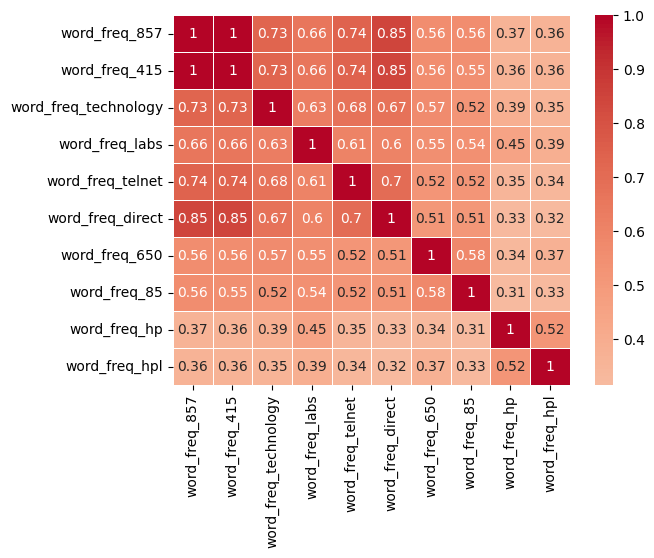

In [ ]:
top_features = corr.abs().mean().sort_values(ascending=False).head(10).index
print(top_features)
sns.heatmap(corr.loc[top_features, top_features], annot=True, cmap='coolwarm', center=0,linewidths=0.5)

#### On visualise les relations entre certaines features du dataset et aussi la target "spam":

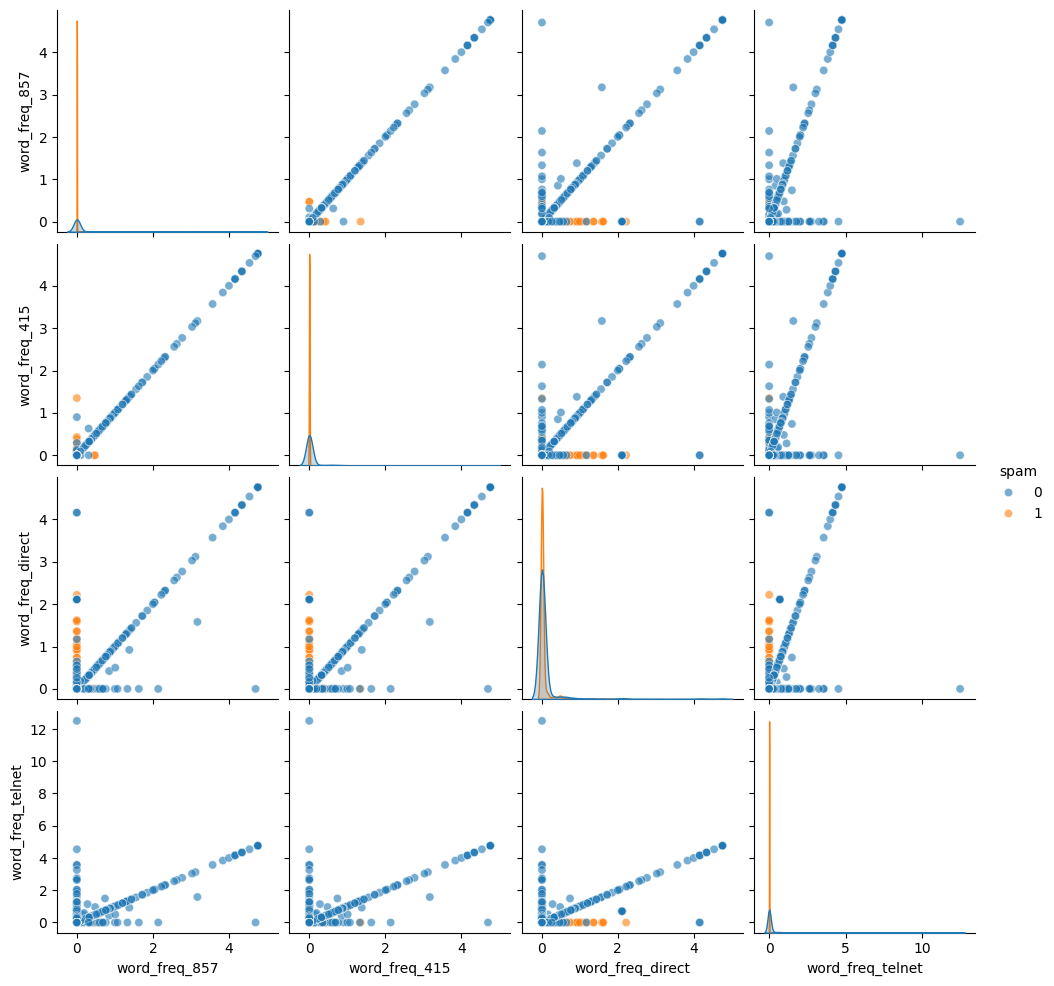

In [ ]:
sns.pairplot(
    df[['word_freq_857', 'word_freq_415', 'word_freq_direct', 'word_freq_telnet', 'spam']],
    hue='spam',
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)

## Commentaires:
### - Le coeff de corrélation varie de -1 à 1. S'il est proche de 1, ca signifie qu’il existe une forte corrélation positive entre les deux features. Lorsqu’il est proche de -1, les variables ont une forte corrélation négative.
### - La matrice de corrélation montre que plusieurs variables présentent des corrélations positives très élevées, notamment word_freq_857, word_freq_415 et word_freq_direct, avec des coefficients dépassant 0.80, ceci est confirmé par les courbes ci-dessus qui montrent des dépendances quasi linéaires entre les variables.

# ETAPE 2 : Entrainement des modèles sans PCA

### Prétraitement des données


In [12]:
X_train, X_test, y_train, y_test = split_data(df_clean,target_column="spam" , apply_pca=False , pca_variance=0.95)

X_train.shape, X_test.shape

Colonne cible utilisée : 'spam'
Split effectué : 3680 train / 921 test


((3680, 57), (921, 57))

### Entrainement des modèles

In [13]:
models, results = train_models(X_train, X_test, y_train, y_test)
pd.DataFrame(results).T


Entraînement du modèle : RandomForest
RandomForest entraîné — Accuracy: 0.946 | F1: 0.930

Entraînement du modèle : KNN
KNN entraîné — Accuracy: 0.903 | F1: 0.873

Entraînement du modèle : NeuralNet
NeuralNet entraîné — Accuracy: 0.935 | F1: 0.916

Résumé des performances :
RandomForest → Accuracy: 0.946 | F1: 0.930
KNN          → Accuracy: 0.903 | F1: 0.873
NeuralNet    → Accuracy: 0.935 | F1: 0.916


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,accuracy,f1_score
RandomForest,0.945711,0.929775
KNN,0.903366,0.872675
NeuralNet,0.934853,0.916435


### Evaluation des modèles


RandomForest


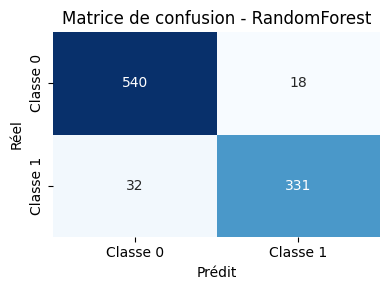


KNN


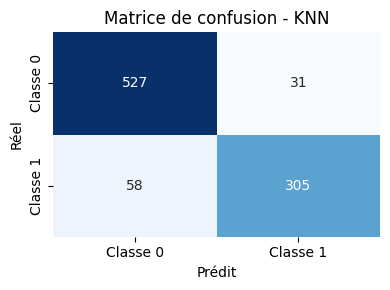


NeuralNet


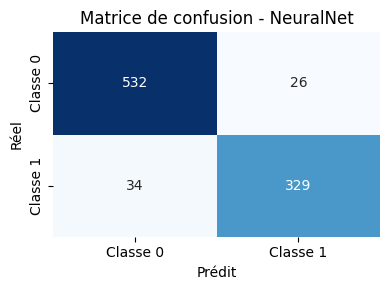

In [ ]:
evaluations = evaluate_models(models, X_test, y_test)

##### Pour ce dataset Spambase (contrairement au dataset Diabetes où on voulait un "bon" recall), nous avons privilégié le F1-score comme métrique " principale " avec l'accuracy, car le problème présente un léger déséquilibre entre les classes et l’erreur la plus critique consiste à mal classifier un spam comme non-spam. Le F1-score permet de trouver un compromis cohérent entre précision et rappel, ce qui en fait une mesure plus représentative de la performance réelle des modèles que l’accuracy seule

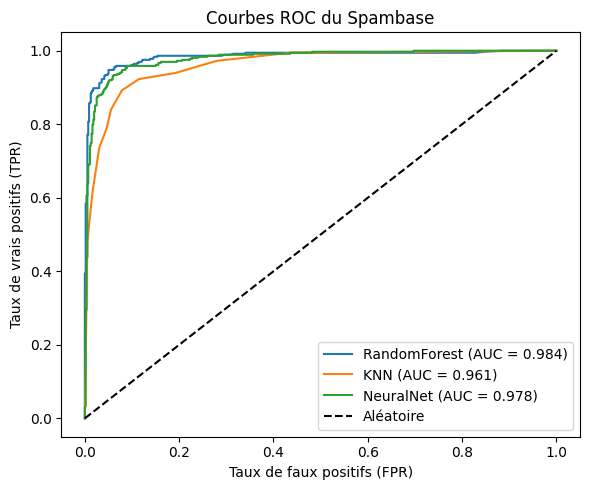

In [15]:
plot_roc_curves(
    models,
    X_test,
    y_test,
    title="Courbes ROC du Spambase"
)

#### Commentaires:

### - Les trois modèles ont un AUC élevé (au-dessus de 0.95), ce qui montre une excellente capacité à distinguer spam / non-spam.


### -Le meilleur modèle est celui dont la courbe est la plus proche du coin supérieur gauche (TPR élevé, FPR faible).


### - Un bon compromis est nécessaire : augmenter les vrais positifs augmente souvent les faux positifs, d’où l’importance du choix du seuil.



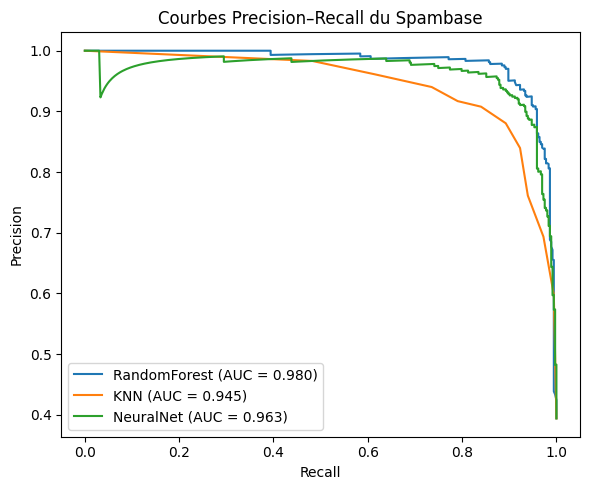

In [ ]:
plot_precision_recall_curves(
    models,
    X_test,
    y_test,
    title="Courbes Precision–Recall du Spambase"
)


### Commentaire : On observe que RandomForest obtient la meilleure courbe, avec un AUC = 0.98, ce qui montre une excellente capacité à détecter les spams tout en gardant une précision élevée. 
#### -> La valeur de l'AUC est calculée sur tous les seuils de classification possibles, ce qui donne une évaluation plus robuste que des métriques basées sur un seuil unique comme la précision simple . 
#### -> Le NeuralNet suit avec un AUC = 0.96, montrant un comportement très proche mais légèrement moins stable en fin de courbe. 
#### -> Le KNN, avec un AUC = 0.95, reste performant mais affiche une baisse plus marquée de la précision lorsque le recall augmente, indiquant qu’il génère davantage de faux positifs dans les "zones difficiles" .

### En résumé : RandomForest est nettement le plus robuste, NeuralNet est compétitif, tandis que KNN montre des limites lorsque le seuil devient exigeant.


# ---------  Remarque importante : 


### Dans un contexte de spam :

#### --- Les faux positifs sont coûteux. Donc, pour les minimiser , nous devons maximiser la Précision et il est donc crucial de choisir un seuil avant que la courbe precision-Rappel ne connaisse une chute finale, afin de maintenir la Précision à un niveau élevé.

#### --- Un F1-Score élevé suggère que le RandomForest est capable d'atteindre un excellent équilibre entre la détection maximale de spams (Rappel) et la minimisation des erreurs coûteuses (Précision).

#### --- Le modèle RandomForest semble le plus robuste et sûr pour ce compromis.

# Feature importance du RandomForest 


Top 15 variables les plus importantes :
                   Feature  Importance
               char_freq_!    0.115733
               char_freq_$    0.095622
          word_freq_remove    0.065479
capital_run_length_average    0.063104
capital_run_length_longest    0.061764
            word_freq_free    0.060216
            word_freq_your    0.056277
              word_freq_hp    0.055966
  capital_run_length_total    0.054438
             word_freq_our    0.029036
             word_freq_you    0.028660
           word_freq_money    0.027534
          word_freq_george    0.027429
             word_freq_hpl    0.022874
             word_freq_edu    0.021391


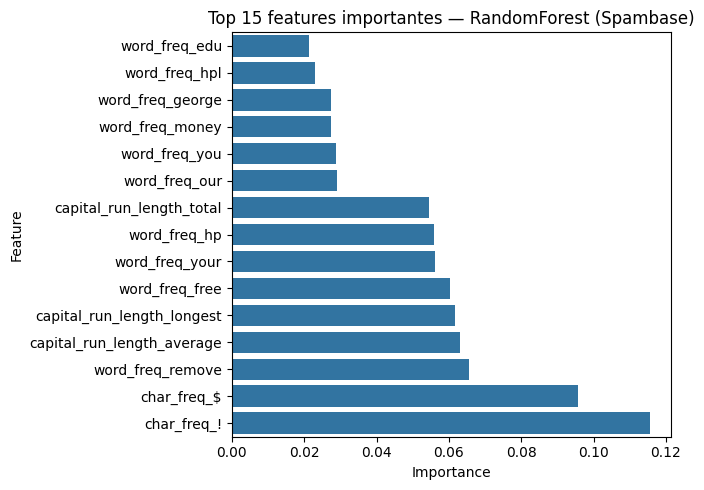

In [17]:
rf_model = models["RandomForest"]

top_features = select_features(
    rf_model,
    X_train,
    top_n=15
)

plot_feature_importances_bar(
    top_features,
    title="Top 15 features importantes — RandomForest (Spambase)"
)

# ETAPE 3 : Entrainement des modèles avec PCA

### Prétraitement des données


In [18]:
df_clean , _ = preprocess_data(df)


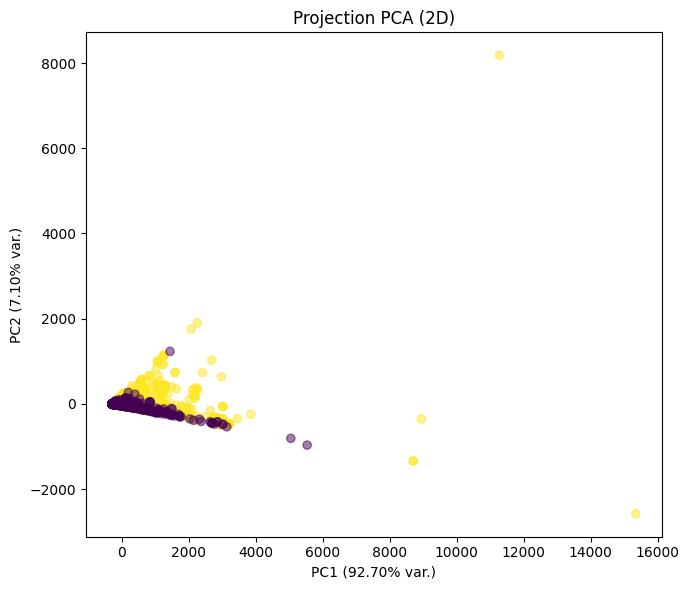

In [19]:
X_pca_input = df_clean.drop(columns=["spam"])
y_pca_input = df_clean["spam"]

plot_pca_2d(X_pca_input,y_pca_input)


## Commentaire : 

#### -> On observe une dominance de PC1 : La première composante principale (PC1) capture à elle seule 92.70% de la variance totale. La seconde composante (PC2) n'ajoute que 7.10%

#### -> les deux classes (spam en jaune et non-spam en violet) sont clairement et linéairement séparées le long de l'axe PC1 . La contribution de PC2 est très faible 7.10% , et l'axe vertical n'ajoute pratiquement aucune information de discrimination supplémentaire. Les deux nuages de points sont déjà distincts sur le seul axe PC1.

## Conclusion : 
#### Étant donné l'excellente séparation des classes observée dans l'espace PCA et le gain de performance potentiel, la prochaine étape logique est de : ré-entrainer nos modèles en utilisant uniquement les données transformées par la PCA (les 2 CPs ou un nombre légèrement supérieur) pour évaluer si cet espace de faible dimension améliore la performance, la stabilité ou le temps de convergence.

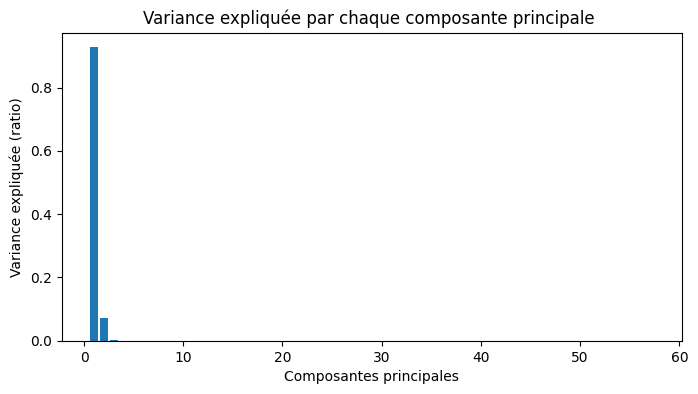

Variance cumulative : 0.9980699846892191 


In [20]:
features = df_clean.drop(columns=["spam"])
pca_full = PCA()
pca_full.fit(features)
n_components = features.shape[1]


plt.figure(figsize=(8, 4))
plt.bar(range(1, n_components + 1), pca_full.explained_variance_ratio_)
plt.xlabel("Composantes principales")
plt.ylabel("Variance expliquée (ratio)")
plt.title("Variance expliquée par chaque composante principale ")
plt.show()

cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
print(f"Variance cumulative : {cumulative_variance[1]} ") ## Pourcentage de variance expliquée par les 2 premières composantes principales


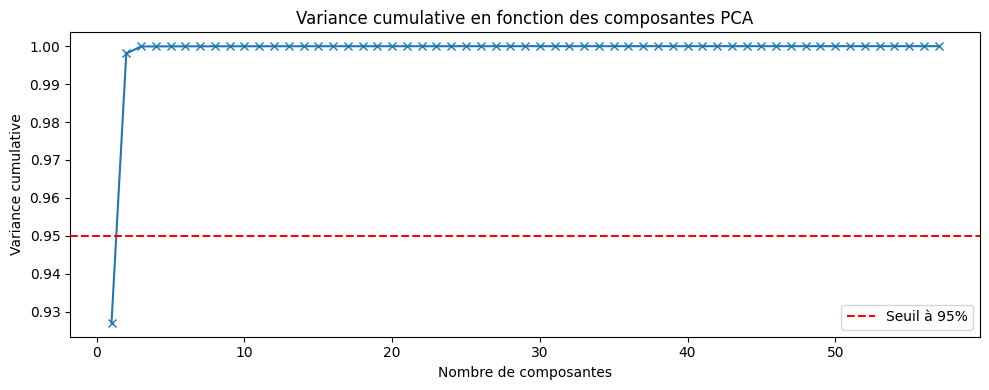

Nombre de composantes nécessaires pour atteindre 95% : 2

Top 5 des features les plus importantes pour PC1 :


,Feature,Contribution
capital_run_length_total,capital_run_length_total,0.986483
capital_run_length_longest,capital_run_length_longest,0.163584
capital_run_length_average,capital_run_length_average,0.009518
word_freq_george,word_freq_george,-0.000531
word_freq_font,word_freq_font,0.000172



Top 5 des features les plus importantes pour PC2 :


,Feature,Contribution
capital_run_length_longest,capital_run_length_longest,0.982474
capital_run_length_total,capital_run_length_total,-0.163778
capital_run_length_average,capital_run_length_average,0.088992
char_freq_(,char_freq_(,0.000561
word_freq_your,word_freq_your,0.000470


In [21]:
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
plt.figure(figsize=(10, 4))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='x')
plt.axhline(0.95, color='red', linestyle='--', label='Seuil à 95%')
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulative")
plt.title("Variance cumulative en fonction des composantes PCA")
plt.legend()
plt.tight_layout()
plt.show()

# On récupère le nombre de composantes nécessaires pour atteindre 95%
threshold = 0.95
k = np.argmax(cumulative_variance >= threshold) + 1  

features = df_clean.drop(columns=["spam"])
feature_names = features.columns 
loadings = pd.DataFrame(
    pca_full.components_[:k],   
    columns=feature_names,
    index=[f"PC{i}" for i in range(1, k+1)]
)

print(f"Nombre de composantes nécessaires pour atteindre 95% : {k}")

for i in range(k):
    pc = loadings.iloc[i]
    print(f"\nTop 5 des features les plus importantes pour {loadings.index[i]} :")
    
    top_features = pc.abs().sort_values(ascending=False).head(5)
    display(pd.DataFrame({
        "Feature": top_features.index,
        "Contribution": pc[top_features.index]
    }))

## Commentaire :   

#### On voit que la variance expliquée chute très rapidement. La première composante principale (CP1) capture quasi-totalité de la variance totale, avec une valeur proche de 1.

#### Composantes Négligeables : Toutes les composantes suivantes (CP2 à CP57) ont une contribution à la variance presque nulle.

#### Le graphique de la variance cumulative révèle une information critique : la courbe atteint presque 1.0 dès la deuxième composante CP2 ... et que seulement 2 composantes principales sont nécessaires pour atteindre et dépasser le seuil de 95% de la variance totale.

## Conclusion : 

#### Cette PCA est extrêmement significative car on est dans le cas d'une réduction de dimensionnalité : De 57 features à 2 CPs ! et elle est possible sans perte majeure d'information.

#### Plus globalement, fixons la variance à 90% ou 95% et trouvons le nb optimal de dimensions : 

In [22]:
loadings = pd.DataFrame(
    pca_full.components_[:k],   
    columns=feature_names,
    index=[f"PC{i}" for i in range(1, k+1)])
pca_90 = PCA(0.90)
X_reduced90 = pca_90.fit_transform(features)

print(f"Nombre de composantes retenues pour 90% de variance : {pca_90.n_components_}")
print(f"Nombre de features concervées  : {X_reduced90.shape[1]}")


## Si l'on veut concerver 95% de la variance 

pca_95 = PCA(0.95)
X_reduced95 = pca_95.fit_transform(features)

print(f" Nombre de composantes retenues pour 95% de variance : {pca_95.n_components_}")
print(f"Nombre de features concervées : {X_reduced95.shape[1]}")

Nombre de composantes retenues pour 90% de variance : 1
Nombre de features concervées  : 1
 Nombre de composantes retenues pour 95% de variance : 2
Nombre de features concervées : 2


## Commentaire IMPORTANT :
#### - Pour garder entre 90% et 95% de la variance, il suffit d'utiliser 2 composantes ce qui est un gain énorme et très important en dimension...

#### - Dans ce cas la PCA sert non seulement a réduire le bruit et les redondances dans les données mais aussi accélérer l'entrainement de nos modèles (comme le MLP ou le KNN) de manière considérable.

In [23]:
df_processed, pca_model = preprocess_data(
    df,
    target_column="spam",
    apply_pca=True,
    pca_variance=0.95
)

In [24]:
X_train, X_test, y_train, y_test = split_data(df_processed, target_column="spam" , apply_pca=True , pca_variance=0.95)


Colonne cible utilisée : 'spam'
Split effectué : 3680 train / 921 test


### Entrainement des modèles avec PCA 

In [25]:
models, results = train_models(X_train, X_test, y_train, y_test)



Entraînement du modèle : RandomForest
RandomForest entraîné — Accuracy: 0.920 | F1: 0.896

Entraînement du modèle : KNN
KNN entraîné — Accuracy: 0.902 | F1: 0.871

Entraînement du modèle : NeuralNet
NeuralNet entraîné — Accuracy: 0.938 | F1: 0.921

Résumé des performances :
RandomForest → Accuracy: 0.920 | F1: 0.896
KNN          → Accuracy: 0.902 | F1: 0.871
NeuralNet    → Accuracy: 0.938 | F1: 0.921


/Users/aliiii/Desktop/projects/ml-project-ue-a/.venv/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Evaluation des modèles avec PCA 


RandomForest


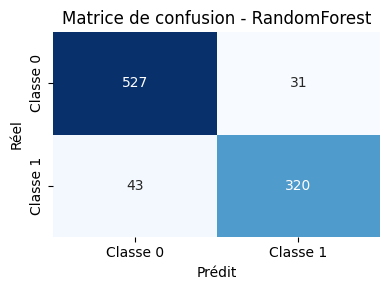


KNN


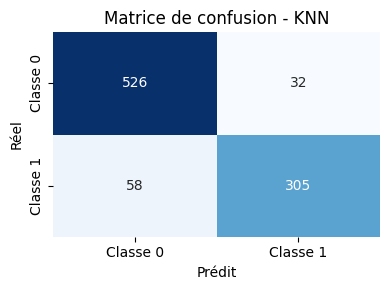


NeuralNet


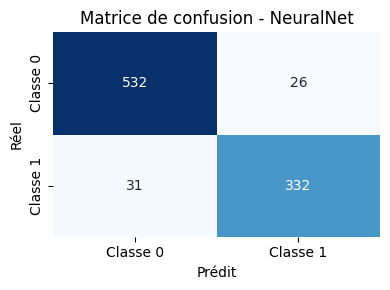

{'RandomForest': {'confusion_matrix': array([[527,  31],
         [ 43, 320]])},
 'KNN': {'confusion_matrix': array([[526,  32],
         [ 58, 305]])},
 'NeuralNet': {'confusion_matrix': array([[532,  26],
         [ 31, 332]])}}

In [26]:
evaluate_models(models, X_test, y_test)


# Conclusion Générale sur l'entrainement avec/sans PCA : 

#### Random Forest est le meilleur modèle : Même après la PCA, le Random Forest reste très performant, mais il est optimisé sans PCA.

#### La PCA n'est pas bénéfique pour tous les modèles :

##### -> La PCA a dégradé la performance du Random Forest en lui faisant perdre l'information détaillée nécessaire à la construction des règles de décision...

##### -> La PCA a legèrement amélioré la performance du MLP qui reste sensible à la collinearité et au bruit aussi . 

# Sélection des features pour le modèle RandomForest qu'on a utilisé : 

In [27]:
model= RandomForestClassifier(random_state=42, n_estimators=800, n_jobs=-1 ,class_weight="balanced") ## les memes hyperparametres que precedemment - voir le workflow.py
model.fit(X_train,y_train)
top_features=select_features(model, X_train, top_n=15)


Top 15 variables les plus importantes :
Feature  Importance
    PC1    0.214831
    PC2    0.198649
    PC9    0.032016
    PC3    0.031416
    PC4    0.022333
    PC5    0.019970
   PC13    0.019805
    PC8    0.019547
    PC6    0.017299
   PC23    0.016682
   PC43    0.015738
   PC10    0.015237
    PC7    0.013968
   PC15    0.013962
   PC41    0.013763


## Commentaire : 

#### Cela confirme nos observations du début et révèle une forte concentration du pouvoir prédictif dans les deux premières composantes principales, PC1 et PC2 , qui dominent largement le classement. Cette concentration, représentant à elles deux à peu près 41% de l'importance totale de cette sélection, atteste du succès de la méthode de la PCA pour extraire le signal essentiel de nos données, rendant les autres composantes relativement marginales. 

# ETAPE 4 :  CHOIX DES HYPERMARAMETRES AVEC LA METHODE DU GRID_SEARCH

#### Cherchons les meilleurs hyperparametres pour nos modèles ( surtout pour le RandomForest et le KNN ) en utilisant la fonction Grid_search de scikit-learn : 

In [28]:

# Pour le RandomForest 

param_grid = {
    'n_estimators': [50,100,200, 300 , 400 , 500 , 800 , 1000],
    'max_depth': [None, 5, 10 , 15 , 20],
    'min_samples_split': [2,5, 10 , 15]
}

best_model, best_params, best_score = grid_search_model(
    RandomForestClassifier(random_state=42),
    param_grid,
    X_train,
    y_train,
    scoring="f1",
    cv=5
)

y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 160 candidates, totalling 800 fits

Résultats du GridSearchCV :
Meilleurs paramètres : {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 400}
Meilleur score (f1) : 0.9208891501081707
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       558
           1       0.91      0.89      0.90       363

    accuracy                           0.92       921
   macro avg       0.92      0.92      0.92       921
weighted avg       0.92      0.92      0.92       921



In [29]:
# Pour le KNN

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 10 , 11, 12, 13,  15 , 21 , 25 ],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

best_knn, params_knn, score_knn = grid_search_model(
    KNeighborsClassifier(),
    param_grid_knn,
    X_train,
    y_train,
    scoring="f1",
    cv=5
)

print("Meilleurs paramètres KNN :", params_knn)
print("Score CV F1 :", score_knn)

y_pred_knn = best_knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 44 candidates, totalling 220 fits

Résultats du GridSearchCV :
Meilleurs paramètres : {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Meilleur score (f1) : 0.8996417613882972
Meilleurs paramètres KNN : {'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
Score CV F1 : 0.8996417613882972
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       558
           1       0.90      0.89      0.89       363

    accuracy                           0.92       921
   macro avg       0.91      0.91      0.91       921
weighted avg       0.92      0.92      0.92       921



### LA CROSS VALIDATION pour RandomForest et KNN avec les hyperparametres "optimaux" qu'on a trouvé avec le GridSearch: 

In [30]:

rf = RandomForestClassifier(n_estimators=400, random_state=42 , n_jobs=-1 , max_depth= 20 , min_samples_split= 5) ## hyperparametres optimaux trouvés juste avant

results_rf = cross_validate_model(
    rf,
    X_train,
    y_train,
    cv=10,
    scoring=("accuracy", "recall", "precision", "f1")
)



Validation croisée pour : RandomForestClassifier
→ Accuracy : 0.9380 ± 0.0160
→ Recall : 0.9097 ± 0.0373
→ Precision : 0.9321 ± 0.0224
→ F1 : 0.9202 ± 0.0214


In [31]:

knn = KNeighborsClassifier(n_neighbors=10, weights='distance', p=2)

results_knn = cross_validate_model(
    knn,
    X_train,
    y_train,
    cv=10,
    scoring=("accuracy", "recall", "precision", "f1")
)



Validation croisée pour : KNeighborsClassifier
→ Accuracy : 0.9228 ± 0.0152
→ Recall : 0.8855 ± 0.0271
→ Precision : 0.9165 ± 0.0267
→ F1 : 0.9004 ± 0.0198


#### Le RandomForest surperforme clairement le KNN sur l’ensemble des métriques, avec une accuracy et un F1 significativement plus élevés et plus stables (faible écart-type).
#### Le KNN reste correct mais montre un recall plus faible et une variabilité plus importante, donc on aura une capacité de généralisation moins robuste que le RandomForest.


## Synthèse finale : 

##### Sans PCA : RandomForest et MLP excellent au niveau des performances , KNN est legèrement inférieur.

##### Avec PCA : les performances restent proches, mais aucun modèle n’en profite réellement( Il faut souligner que le F1 score est legèrement meilleur pour le MLP et KNN en comparaison avec ce qu'on avait sans PCA ).

##### Cross-validation : RandomForest confirme sa position de meilleur compromis entre performance et stabilité .
